# Теория сложных сетей в экономике

# Лекция 1, Часть 1. Введение в теорию сложных сетей. Знакомство с библиотекой NetworkX.

## Макрушин Сергей Вячеславович, Финансовый университет, 2020 г.
v 0.2

In [1]:
# загружаем стиль для оформления презентации
from IPython.display import HTML
from urllib.request import urlopen
html = urlopen("file:./lec_v1.css")
HTML(html.read().decode('utf-8'))

-----
### Знакомство с теорией сложных сетей

<em class="df"></em> __Теория сложных сетей__ (ТСС, network theory, complex network theory) изучает сложные взаимодействующие системы которые могут быть представлены в виде графа


---
#### Примеры сложных сетей в разных предметных областях

* Интернет и веб-граф: 
    * каналы связи между узлами интернета
    * веб-граф
    
<center> 
<img src="./img/l01_nex_int1.png" alt="Сеть интернет" style="width: 400px;"/><br/>
    <em class="ex"></em> <b>Визуализация графа каналов связи между узлами интернета</b>    
</center>

* Коммуникационные сети: 
    * телефонные звонки 
    * электронные письма
    * сообщения в мессенджерах
    * сети контактов      
* Социальные сети:
    * сеть знакомств (социальная сеть)
    * сеть "друзей" в социальной сети    
    * в социальных сетях: посты / лайки / сообщения и т.п.    

<center> 
<img src="./img/l01_nex_fb2.png" alt="Сеть Facebook" style="width: 700px;"/><br/>
    <em class="ex"></em> <b>Визуализация социального графа Facebook</b>    
</center>
    
* Рекомендательные сервисы:
    * товары -- покупки
    * музыкальные композиции -- слушатели / фильмы / книги и т.п.
    
<center> 
<img src="./img/l01_nex_fans1.png" alt="Сеть сериала Netflix" style="width: 500px;"/><br/>
    <em class="ex"></em> <b>Визуализация сообществ зрителей сериала сервиса Netflix</b>    
</center>

* Бизнес, экономические, торговые, политические сети:

<center> 
<img src="./img/l01_nex_agrotrade1.png" alt="Сеть торговли" style="width: 700px;"/><br/>
    <em class="ex"></em> <b>Визуализация торговой сети для сельскохозяйственной продукции</b>    
</center>

* Семантические сети: 
    * смысловые связи слов и понятий 
    * базы знаний -- смысловые отношения между, объектами реального мира, понятиями
    
<center> 
<img src="./img/l01_nex_wordnet1.png" alt="Сеть WordNet" style="width: 600px;"/><br/>
    <em class="ex"></em> <b>Визуализация связанных слов из WordNet</b>    
</center>  

* Технологические, транспортные сети:
    * сети автодорог / железных дорог / авиамаршруты и т.п.
    * линии электропередачи / газопроводы / теполсети и т.п.

<center> 
<img src="./img/l01_nex_fly1.png" alt="Сеть авиамаршрутов" style="width: 700px;"/><br/>
    <em class="ex"></em> <b>Визуализация глобальной сети авиамаршрутов</b>    
</center>  

* Биологические сети:
    * взаимодействие белков
    * наследственная информация
    * нейронные сети
    
<em class="cr"/><b>NB!</b></em> __ТСС изучает эмперические сети (графы)!__ В этом ТСС больше похожа на физику, чем на теорию графов.

---
#### В чем заключается "сложность" сложных сетей?

<center> 
<img src="./img/l01_order_vs_disorder1.png" alt="Сеть авиамаршрутов" style="width: 700px;"/><br/>
    <b>Схематическое сравнение регулярных и полностью случайных систем</b>    
</center>

* Есть хорошо разработанные математические методы для работы с крайними случаями: "чисто" регулярными и "чисто" случайными системами (в т.ч. графами).
* <em class="df"></em> __Статистическая физика__ - вероятностный подход к равновесным макроскопическим свойствам систем с большим числом степеней свободы.
* Намного сложнее изучать промежуточные случаи, к которым можно отнести большинство эмпирических сетей. 

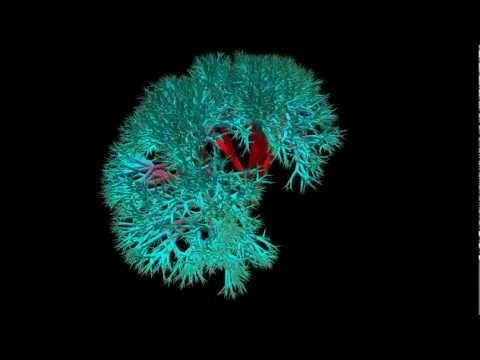

In [10]:
from IPython.display import YouTubeVideo
# Probabilistic random fractal tree:
YouTubeVideo('ydp0ogLg5Qs')

    
* <em class="df"></em>(альтернативное) __Теория сложных сетей__  изучает модели реальных явлений, представимых в виде графов и имеющих __*нетривиальную топологическую структуру (не регулярные решетки и не случайные графы)*__
* Большинство "эмпирических сетей", "реальных явлений", "реальных систем, представленных в виде графа" по сути является _сложными системами_ (_complex systems_)

_Из Википдии, статья "complex system"_:
* A __complex system__ is a system composed of __many components__ which may __interact__ with each other. Examples of complex systems are Earth's global climate, organisms, the __human brain__, infrastructure such as __power grid__, __transportation or communication systems__, social and economic organizations (like cities), an ecosystem, a living cell, and ultimately the entire universe.
* Complex systems are systems whose behavior is intrinsically difficult to model due to the dependencies, competitions, relationships, or other types of interactions between their parts or between a given system and its environment. Systems that are "complex" have distinct properties that arise from these relationships, such as:
    * __nonlinearity__, 
    * __emergence__ (*the presence of __emergent behaviors and properties__: these are traits of a system that are not apparent from its components in isolation but which __result from the interactions, dependencies, or relationships__ they form when placed together in a system*), 
    * __spontaneous order__ (*appearance of __unplanned order__, it is __spontaneous order__ (in the social sciences, Ex: individuals coordinates their actions without centralized planning) or __self-organization__(in physical sciences, Ex: global symmetry of certain crystals)*),
    * __adaptation__ (*pecial cases of complex systems that are adaptive in that they __have the capacity to change and learn from experience__*), 
    * and __feedback loops__ (*both negative and positive feedback),
    * ... among others. 
    
    Because such systems appear in a wide variety of fields, __*the commonalities among them have become the topic of their independent area of research*__. In many cases, __*it is useful to represent such a system as a network*__ where the nodes represent the components and links to their interactions.
    
    __*Networks often describe the sources of complexity in complex systems*__. __*Studying complex systems as networks*__, therefore, enables many useful applications of graph theory and __network science__. __*Some complex systems, for example, are also complex networks, which have properties such as phase transitions and power-law degree distributions that readily lend themselves to emergent or chaotic behavior*__. 
    
Непосредственное изучение связей между элементами сложной сети (сети связей) может являтся эффективным способом анализа сложных систем, в частности при предсказании их поведения. 

---
#### Феномен универсальности свойств сложных сетей

<em class="qs"></em> Как могут одинаковые математические модели подходить для исследования сетей из таких разных предметных областей?
    
<em class="an"></em> Закономерности развития сложных сетей определяют появление в них ряда 
типовых структур, что делает продуктивным рассмотрение сетей различной природы в рамках общей теории

1. Сложные сети являются продуктом процесса роста, управляемого определенным набором правил.
2. Существует небольшой набор универсальных правил роста сетей, встречающихся в большом количестве сетей в различных предметных областях.
3. Схожесть правил, определяющих рост сетей, приводит к схожести структуры сложных сетей.
4. Схожесть структуры у сетей различной природы позволяет рассматривать их в рамках общей теории.

<center> 
<img src="./img/l01_city_network1.png" alt="Городская дорожная сеть" style="width: 350px;"/><br/>
    <em class="ex"></em> <b>Пример роста сети: городская дорожная сеть
</b>    
</center> 
<br/>    
<center> 
<img src="./img/l01_net_growth1.png" alt="Сеть авиамаршрутов" style="width: 350px;"/><br/>
    <em class="ex"></em> <b>Пример ключевой роли правил, определяющих рост сети: различные настройки алгоритма роста сети на идентичном наборе узлов
</b>    
</center>       
    
По сути, представление в виде сети:
* универсальный способ представления сложных систем / сложных данных
* позволяет исопльзовать общий инструментарий для разных предметных областей

---
#### Появление теории сложных сетей

<center> 
<img src="./img/l01_emerge_cnt1.png" alt="Появление ТСС" style="width: 600px;"/><br/>
    <b>Логика возникновения теории сложных сетей</b>    
</center> 



---
#### Задачи теории сложных сетей


Main questions:
How do we take advantage of 
relational structure for better 
prediction?



Predict the type/color of a given node
§ Node classification
¡ Predict whether two nodes are linked
§ Link prediction
¡ Identify densely linked clusters of nodes
§ Community detection
¡ Measure similarity of two nodes/networks
§ Network similarity


Наиболее распространены следующие виды исследования сложных сетей:
* Исследование статистических свойств сетей:
    * определение основных метрик сети;
    * выделение кластеров / сообществ;
    * выявление узлов с особыми свойствами / классификация узлов;
    * предстказание связей между узлами;
    * измерение схожести узлов /сетей.
* Анализ изменения свойств сетей при изменении структуры сети, например:
    * анализ устойчивости сети к удалению узлов или связей.
* Диффузия информации (распространение инфекции) в сетях.
* Поиск в сетях.

В частности, явное моделирование взаимосвязей элементов системы может продемонстрировать лучшую производительность в задачах машинного обучения.

<center> 
<img src="./img/l01_net_analysis1.png" alt="Анализ сетей" style="width: 600px;"/><br/>
    <b>Логика анализа сложны сетевых структур</b>    
</center>

* Создание моделей сетей:
    * определение принципа, определяющего рост сети;
    * создание сетей-аналогов ("клонов");
    * поиск оптимальной структуры сети. 

---
# Спасибо за внимание!

---
### Технический раздел:

<br/> next <em class="qs"><qs/> qs line 
<br/> next <em class="an"><qs/> an line 
<br/> next <em class="nt"><qs/> an line 
<br/> next <em class="df"><qs/> df line 
<br/> next <em class="ex"><qs/> ex line 
<br/> next <em class="pl"><qs/> pl line 
<br/> next <em class="mn"><qs/> mn line 
<br/> next <em class="plmn"><qs/> plmn line 
<br/> next <em class="hn"><qs/> hn line 